# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mayank Sawant

# **Project Summary -**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who stand to lose money because on unpaid debts. Since computers can store huge dataset pertaining to bankruptcy making accurate predictions from them before hand is becoming important.

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

The main objective of this project is to use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.

This dataset didn’t have any missing values, this saved some time. Then I moved on to EDA where I plotted the target feature bankruptcy which was heavily imbalance and then plotted positively and negatively correlated features with bankruptcy.

Now comes the Data Preparation where the target feature was imbalanced so I had to implement SMOTE Synthetic Minority Oversampling Technique (SMOTE) which is a statistical technique for increasing the number of cases in your dataset in a balanced way.
Further on scaling data and train test spilt is done to end the Data Preparation.

In this project, total 5 classification models are used which are Logistic Regression, Support Vector Classifier, Decision Trees, Random Forest and XGBoost. After hyperparameter tuning with GridSearch it was found that XGBoost is the optimal model for this project.

To increase the model performance, PCA was also implemented. PCA slightly increased the score but not worth the time took for fitting PCA. One can skip dimension reduction if the gain is tiny. At last, as per the F1 score XGBoost was the best choice for this project.

This was all about my analysis and training that I did, and based on result and my inferences I make the following conclusion:

There are many attributes that play important roles to decide whether a company will go bankrupt or not.
Net Income Flag plot showed us that most of the companies are running into Losses for the past 2 years.
There are high chances that a company can go Bankrupt if the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” are high.
The best performing model is XGBoost by considering the F1 score which is an ideal metric to choose for a classification model.


# **GitHub Link -**

https://github.com/Mayank1911/Company-Bankruptcy-Prediction

# **Problem Statement**


Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important.

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Dataset Information**



*   Number of instances: 6819
*   Number of attributes: 96

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from random import randint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# loading dataset
file_path = '/content/gdrive/MyDrive/Company Bankruptcy Prediction - Mayank Sawant/COMPANY BANKRUPTCY PREDICTION.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Dataset Rows & Columns count

In [5]:
# checking dataset shape
df.shape

(6819, 96)

### Dataset Information

In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
df.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

## 2. ***Data Wrangling***

### Data Wrangling Code

In [11]:
df.columns = df.columns.str.replace(' ', '') # removing spaces from column names for ease.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    6599
1     220
Name: Bankrupt?, dtype: int64


<Axes: xlabel='Bankrupt?', ylabel='count'>

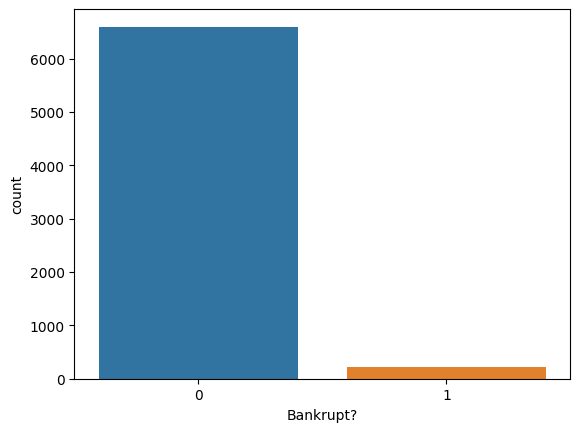

In [12]:
#count of bankrupt companies
print(df['Bankrupt?'].value_counts())
sns.countplot(x=df["Bankrupt?"])

##### 1. Why did you pick the specific chart?

The chart chosen is a count plot, which is a type of bar chart. It's suitable for visualizing the distribution of a categorical variable, in this case, the "Bankrupt?" variable. This chart helps to quickly understand the balance between the two classes (bankrupt and not bankrupt) and is useful for identifying any class imbalance.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the majority of companies (6599) in the dataset are not bankrupt (labeled as 0), while a much smaller number (220) are labeled as bankrupt (labeled as 1). This indicates a class imbalance, which is common in datasets related to rare events such as bankruptcy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Impact:

The insight that the majority of companies are not bankrupt is generally positive for the overall health of the business environment represented in the dataset. It suggests that the financial health of most companies is stable.
This information could be reassuring for investors, stakeholders, and policymakers who are interested in the financial stability of companies.

###Negative Growth or Impact:

The class imbalance could pose challenges if the model is used for predictive modeling, especially if the goal is to predict bankruptcies. A model trained on imbalanced data might have a bias towards the majority class and may not perform well in identifying the minority class.
If the goal is to predict bankruptcies, the model might need additional techniques such as oversampling the minority class, using different evaluation metrics, or employing advanced modeling techniques to address the class imbalance issue.
Without addressing this imbalance, the model might be more inclined to predict that companies are not bankrupt, potentially leading to false negatives in identifying companies that are actually at risk of bankruptcy.

#### Chart - 2

0    6811
1       8
Name: Liability-AssetsFlag, dtype: int64


<Axes: xlabel='Liability-AssetsFlag', ylabel='count'>

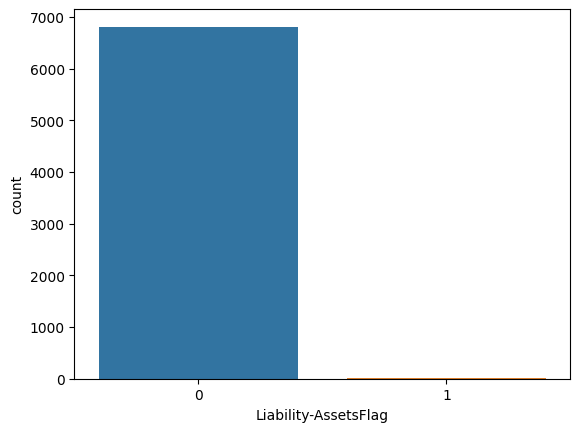

In [ ]:
#plotting count of liability-assets flag
print(df['Liability-AssetsFlag'].value_counts())
sns.countplot(x=df['Liability-AssetsFlag'])

##### 1. Why did you pick the specific chart?

The chosen chart is a count plot, which is suitable for visualizing the distribution of a categorical variable, in this case, the "Liability-AssetsFlag" variable. This type of plot is effective for displaying the frequency or count of each category within the variable.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the majority of instances (6811) have a value of 0 for the "Liability-AssetsFlag" variable, while only a very small number (8) have a value of 1. This indicates a significant imbalance in the distribution of this variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Impact:

The insight that the majority of instances have a value of 0 for the "Liability-AssetsFlag" variable could be positive if having a value of 0 is associated with a desirable or normal condition in the business context.
This information might indicate that, in the majority of cases, the ratio of liabilities to assets is below a certain threshold, which could be seen as a financially stable or healthy condition.

###Negative Growth or Impact:

The small number of instances with a value of 1 for the "Liability-AssetsFlag" variable may represent cases where the ratio of liabilities to assets is above a certain threshold. This could be an indicator of financial stress or higher risk.
If high values of "Liability-AssetsFlag" are indeed associated with financial distress, this insight could be a signal for further investigation or proactive management strategies to mitigate potential negative impacts on business growth.

#### Chart - 3

1    6819
Name: NetIncomeFlag, dtype: int64


<Axes: xlabel='NetIncomeFlag', ylabel='count'>

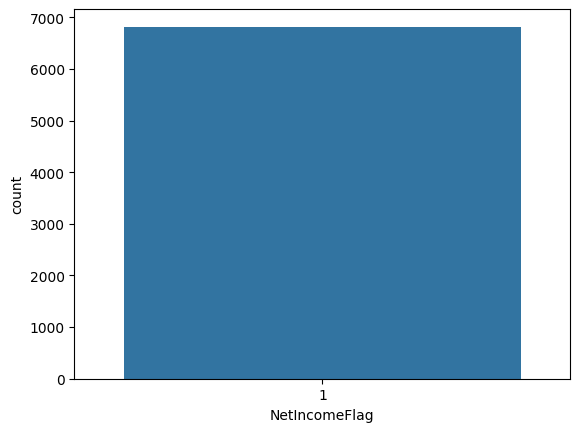

In [ ]:
#plotting total count of net income flag
print(df['NetIncomeFlag'].value_counts())
sns.countplot(x=df['NetIncomeFlag'])

##### 1. Why did you pick the specific chart?

The chosen chart is a count plot, which is suitable for visualizing the distribution of a categorical variable, in this case, the "NetIncomeFlag" variable. The count plot provides a quick overview of the frequency or count of each category within the variable.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that all instances (6819) have a value of 1 for the "NetIncomeFlag" variable. This indicates that the entire dataset has a consistent category for this variable, and there is no variation in values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

The uniformity in the "NetIncomeFlag" variable suggests that, in all instances, the net income is flagged in a consistent manner. This could be positive if the flag is used to denote a desirable or expected condition (e.g., positive net income).

Negative Growth or Impact:

The lack of variation in the "NetIncomeFlag" variable means that there may not be meaningful distinctions in net income conditions across the dataset. This could limit the insights gained from this variable for decision-making or analysis.
If the "NetIncomeFlag" is meant to capture different states or conditions of net income, its lack of variation could hinder the ability to identify and address specific financial scenarios, potentially leading to a limited understanding of financial performance.

In [ ]:
#creating numerical and categorical dataframes
numerical_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-AssetsFlag', 'NetIncomeFlag']

In [ ]:
#poitively and negatively correlated features with bankrupt
positive_corr = df[numerical_features].corrwith(df['Bankrupt?']).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numerical_features].corrwith(df['Bankrupt?']).sort_values()[:6].index.tolist()

In [ ]:
positive_corr = df[positive_corr + ["Bankrupt?"]].copy()
negative_corr = df[negative_corr + ["Bankrupt?"]].copy()

In [ ]:
#defining function to plot
def corrbargraph(x_value, y_value):

    plt.figure(figsize=(15,8))

    for i in range(1,7):
        plt.subplot(2,3,i)
        sns.barplot(x = x_value, y = y_value[i-1],data = df, palette='Set2')

    plt.tight_layout(pad=0.5)

#### Chart - 4

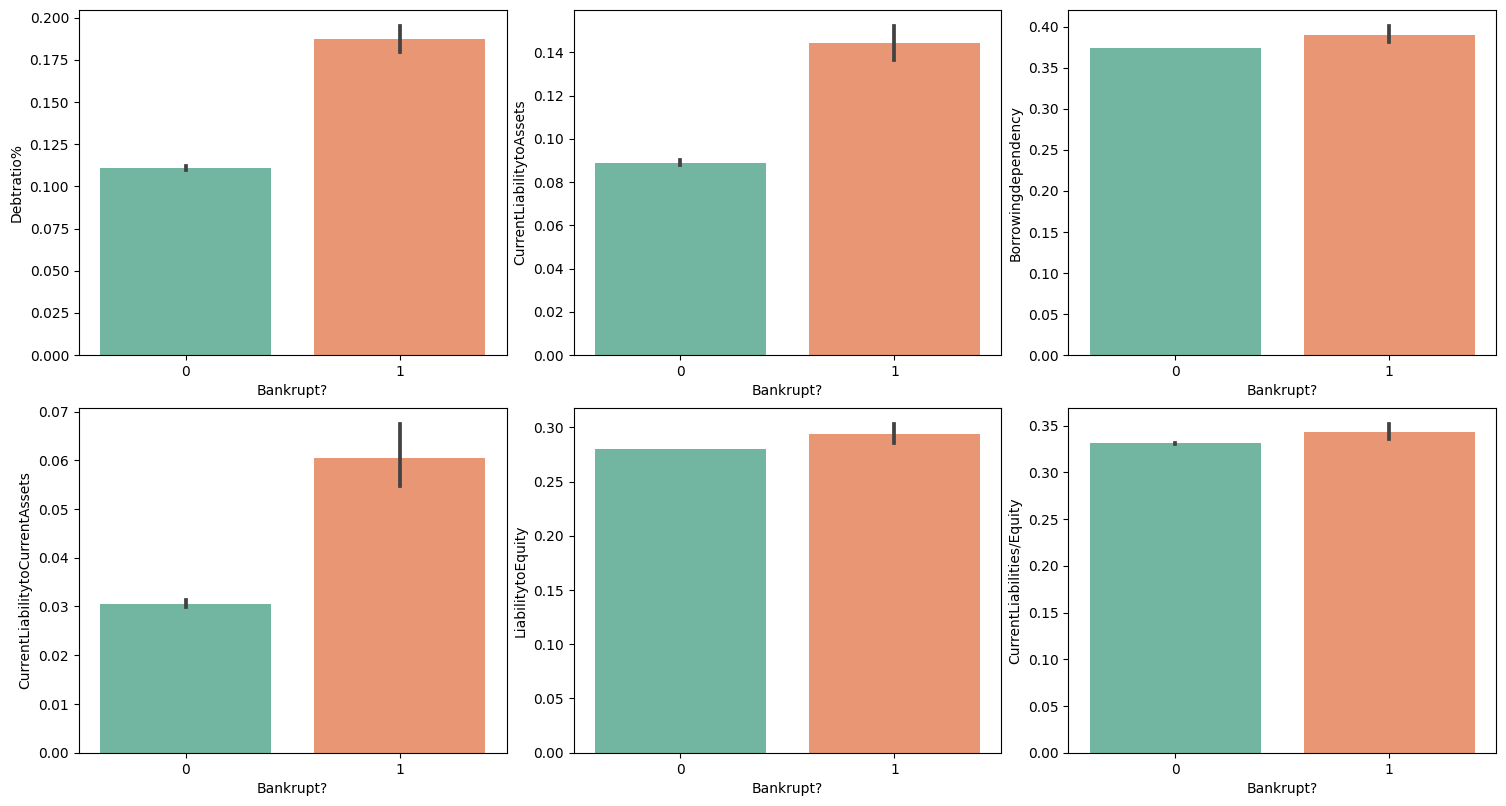

In [ ]:
#plotting positively correlated features with bankrupt
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

##### 1. Why did you pick the specific chart?

 A bar graph allows for a quick identification of features that have a notable positive correlation with the target variable. This can be important for feature selection or understanding which features might be influential in predicting the target.

##### 2. What is/are the insight(s) found from the chart?

In bankrupt organizations attributes such as Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets are found to be higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The insights can be valuable for risk management and proactive decision-making. If these attributes are identified as significant predictors of bankruptcy, organizations can monitor and manage them more closely.
Financial strategies and risk mitigation plans can be developed to address and reduce high debt ratios and liabilities.

Potential Negative Impact on Growth:

High Debt Ratio %, Current Liability To Assets, and Current Liability To Current Assets can indicate financial stress and instability. If not addressed, these conditions could potentially lead to negative growth.
High debt ratios may result in financial constraints, limiting the organization's ability to invest in growth initiatives or take advantage of new opportunities.
Elevated current liabilities in relation to assets and current assets could signal liquidity challenges, hindering the organization's ability to meet short-term obligations and fund ongoing operations.

#### Chart - 5

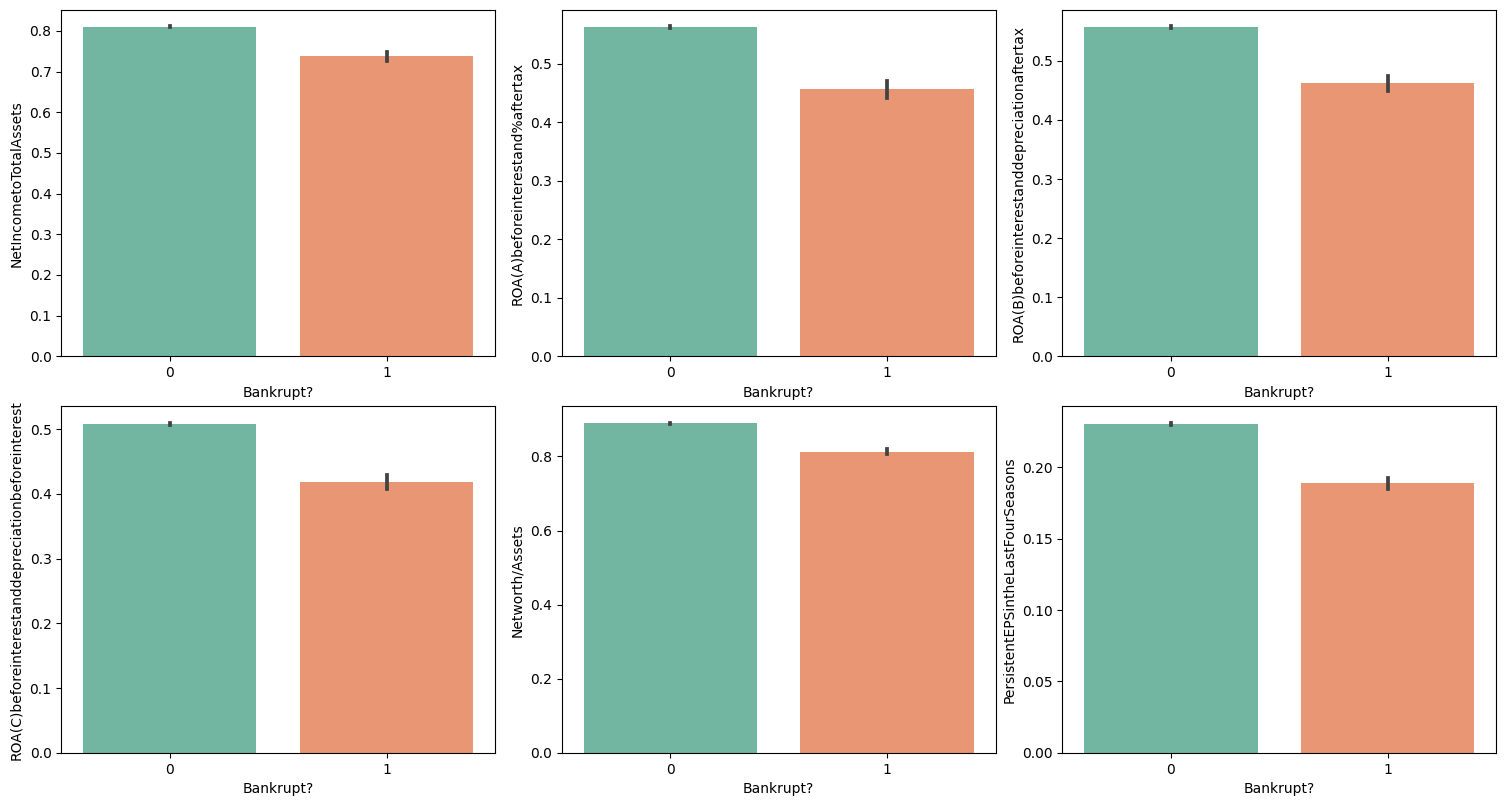

In [ ]:
#plotting negatively correlated features with bankrupt
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

##### 1. Why did you pick the specific chart?

 A bar graph allows for a quick identification of features that have a notable positive correlation with the target variable. This can be important for feature selection or understanding which features might be influential in predicting the target.

##### 2. What is/are the insight(s) found from the chart?

These plot shows that an organization is less likely to be bankrupt when they typically earn more and hold more assets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The insights are positive as they suggest that higher earnings and a greater amount of assets are associated with a lower likelihood of bankruptcy.
This information can guide strategic decision-making, highlighting the importance of revenue generation and asset management for financial stability.

Potential Negative Impact on Growth:

While the insights are generally positive, there's a need to consider potential pitfalls:
Overemphasis on Earnings: If the organization focuses solely on maximizing earnings without considering factors such as cost efficiency and risk management, it might engage in risky or unsustainable practices that could lead to negative growth in the long term.
Asset Quality: The absolute amount of assets alone might not guarantee financial health. If assets are not efficiently utilized, or if they consist of depreciating or illiquid assets, it may not contribute positively to growth.

#### Chart - 6

In [ ]:
#creating independent and dependent feature dataframes
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

cols = X.columns
#scaling
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols)
#train test spilt
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

0    5286
1     169
Name: Bankrupt?, dtype: int64


<Axes: xlabel='Bankrupt?', ylabel='count'>

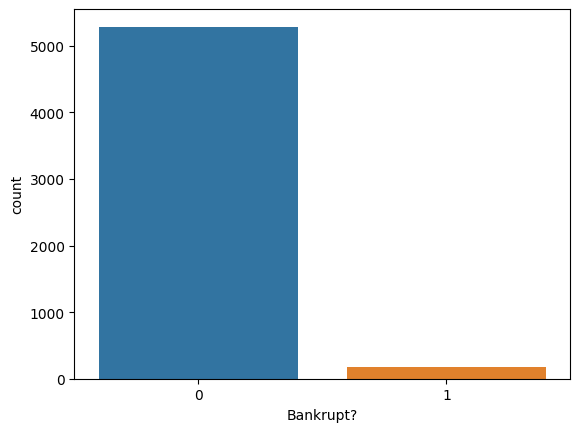

In [ ]:
#target feature before SMOTE
print(y_train.value_counts())
sns.countplot(x=y_train)

##### 1. Why did you pick the specific chart?

The chosen chart is a count plot, which is suitable for visualizing the distribution of a categorical variable, in this case, the target feature 'Bankrupt?' before applying the Synthetic Minority Over-sampling Technique (SMOTE).

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the dataset has a class imbalance, where the majority class (0 - not bankrupt) has a significantly higher count than the minority class (1 - bankrupt).
Specifically, there are 5286 instances of the not bankrupt class (0) and only 169 instances of the bankrupt class (1).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

The insight gained from the chart is crucial for understanding the class distribution before applying any oversampling technique like SMOTE.
Knowing the class imbalance is important for the modeling process, as imbalances can affect the performance of machine learning models, particularly in scenarios where the minority class is of interest (e.g., predicting bankruptcies).

Potential Negative Impact on Growth:

The class imbalance could lead to challenges in the model's ability to accurately predict the minority class. In this case, it might struggle to identify instances of bankruptcy.
If the model is not able to effectively predict bankruptcies, it could lead to negative growth if financial risks are not appropriately identified and managed.

#### Chart - 7

In [ ]:
#applying smote
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

0    5286
1    5286
Name: Bankrupt?, dtype: int64


<Axes: xlabel='Bankrupt?', ylabel='count'>

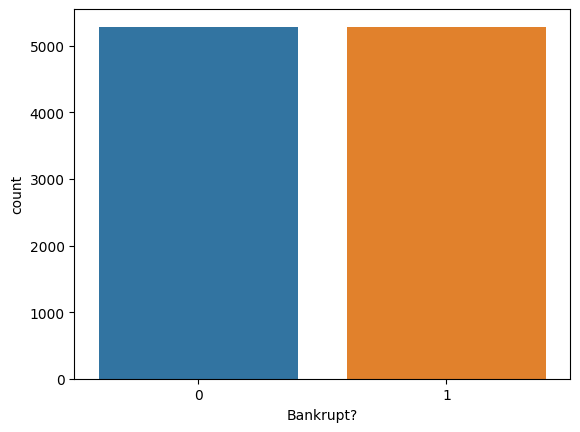

In [ ]:
# this how target feature now looks after resampled using smote
print(y_train.value_counts())
sns.countplot(x=y_train)

##### 1. Why did you pick the specific chart?

The chosen chart is a count plot, similar to the one used before applying SMOTE. It is suitable for visualizing the distribution of the target feature 'Bankrupt?' after resampling using SMOTE.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that after applying SMOTE, the class distribution has been balanced. Both the not bankrupt class (0) and the bankrupt class (1) now have an equal count of 5286 instances each.
The class imbalance issue has been effectively addressed through oversampling of the minority class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

The primary insight is that the imbalanced class distribution issue has been successfully mitigated using SMOTE.
With a balanced class distribution, the machine learning model is less likely to be biased towards the majority class, improving its ability to generalize and make accurate predictions for both classes.

Potential Negative Impact on Growth:

While the balanced class distribution is generally positive, it's crucial to consider the potential impact of oversampling on the model's performance.
In some cases, oversampling might lead to overfitting on the minority class, and the model may perform poorly on unseen data. This could potentially lead to negative growth if the model's predictions are not reliable in real-world scenarios.

#### Chart - 8 - Correlation Heatmap

<Axes: >

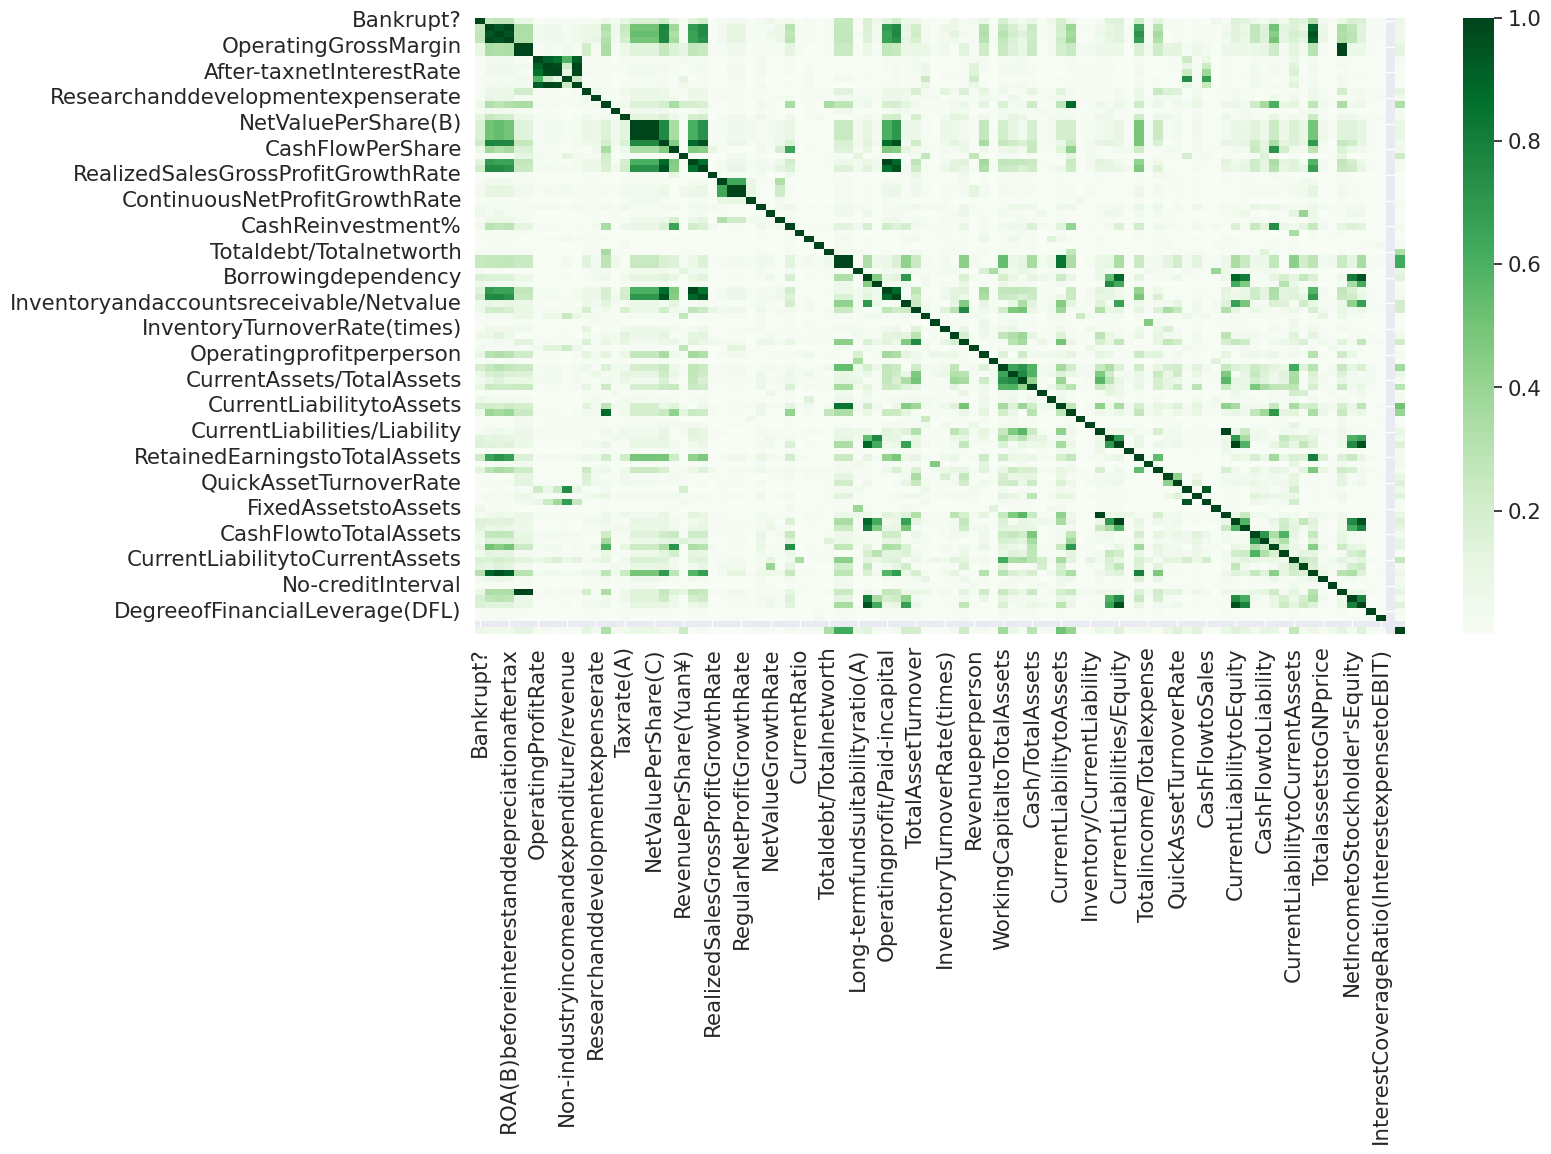

In [ ]:
#correlation heatmap
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.set(font_scale=1.4)
sns.heatmap(abs(correlation), annot=False, cmap='Greens')

##### 1. Why did you pick the specific chart?

To find the correlation of features present in the datasets.

##### 2. What is/are the insight(s) found from the chart?

Most of the features are not highly correlated to each other, while few of them correlate to each other.

## ***4. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean Net Income to Total Assets ratio between companies that went bankrupt and those that did not.
Alternate Hypothesis (H1): There is a significant difference in the mean Net Income to Total Assets ratio between companies that went bankrupt and those that did not.

#### 2. Perform an appropriate statistical test.

In [18]:
from scipy import stats

In [19]:
# Perform Statistical Test to obtain P-Value
# Hypothesis 1
group_a = df[df['Bankrupt?'] == 1]['NetIncometoTotalAssets']
group_b = df[df['Bankrupt?'] == 0]['NetIncometoTotalAssets']
t_statistic, p_value_1 = stats.ttest_ind(group_a, group_b)

# Print the p-value
print("P-Value for Hypothesis 1:", p_value_1)

P-Value for Hypothesis 1: 2.0981022219111036e-157


##### Which statistical test have you done to obtain P-Value?

Two-sample t-test.

##### Why did you choose the specific statistical test?

We chose the two-sample t-test because we are comparing the means of two independent groups (companies that went bankrupt and those that did not) and assuming the data follows a normal distribution.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average Current Ratio is the same for companies that went bankrupt and those that did not.
Alternate Hypothesis (H1): There is a significant difference in the average Current Ratio between companies that went bankrupt and those that did not.

#### 2. Perform an appropriate statistical test.

In [20]:
# Perform Statistical Test to obtain P-Value
# Hypothesis 2
group_a = df[df['Bankrupt?'] == 1]['CurrentRatio']
group_b = df[df['Bankrupt?'] == 0]['CurrentRatio']
u_statistic, p_value_2 = stats.mannwhitneyu(group_a, group_b)

# Print the p-value
print("P-Value for Hypothesis 2:", p_value_2)

P-Value for Hypothesis 2: 2.8775204728925913e-55


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test.

##### Why did you choose the specific statistical test?

We chose the Mann-Whitney U test because it is a non-parametric test suitable for comparing distributions of two independent groups when the assumption of normality is not met, which might be the case for financial ratios.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The median Total Asset Turnover is the same for companies that went bankrupt and those that did not.
Alternate Hypothesis (H1): There is a significant difference in the median Total Asset Turnover between companies that went bankrupt and those that did not.

#### 2. Perform an appropriate statistical test.

In [23]:
# Hypothesis 3
# Using Mann-Whitney U test for Total Asset Turnover
group_a = df[df['Bankrupt?'] == 1]['TotalAssetTurnover']
group_b = df[df['Bankrupt?'] == 0]['TotalAssetTurnover']
u_statistic, p_value_3 = stats.mannwhitneyu(group_a, group_b)

# Print the p-value
print("P-Value for Hypothesis 3:", p_value_3)

P-Value for Hypothesis 3: 1.0710164814355221e-13


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test.

##### Why did you choose the specific statistical test?

We chose the Mann-Whitney U test because it is a non-parametric test suitable for comparing distributions of two independent groups when the assumption of normality is not met, which might be the case for financial ratios.

## ***5. ML Model Implementation***

### ML Model - 1

In [ ]:
#defining model parameters
model_params = {
    'Logistic':{
        'model':LogisticRegression(random_state=42),
        'params':{
            'Logistic__C':[0.001,0.1,1,2],
            'Logistic__solver':['newton-cg','sag','lbfgs','liblinear']
        }
    },
    'SVC':{
        'model':SVC(random_state=42),
        'params':{
            'SVC__C':[0.01,0.1,1,2]
        }
    },
    'DecisionTC':{
        'model':DecisionTreeClassifier(random_state=42),
        'params':{
            'DecisionTC__min_samples_split':[2,4]
        }
    },
    'RandomFC':{
        'model':RandomForestClassifier(random_state=42),
        'params':{
            'RandomFC__n_estimators':[100,140,200,300,400],
            'RandomFC__max_depth':[2,4],
            'RandomFC__min_samples_split':[2,4,6],
            'RandomFC__min_samples_leaf':[1,2]
        }
    },
    'XGBoost':{
        'model':XGBClassifier(),
        'params':{
            'XGBoost__n_estimators':[400,500]
        }
    }
}

In [ ]:
# training model with gridsearchcv
models_d = {}
score = []
for model_name,mp in model_params.items():
    pipeline = Pipeline([(model_name,mp['model'])])
    clf = GridSearchCV(pipeline,mp['params'],cv=5,n_jobs=14,verbose=2,scoring='recall_weighted')
    clf.fit(X_train,y_train)
    score.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })
    models_d[model_name] = clf
    print(f'{model_name} model done')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Logistic model done
Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVC model done
Fitting 5 folds for each of 2 candidates, totalling 10 fits
DecisionTC model done
Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomFC model done
Fitting 5 folds for each of 2 candidates, totalling 10 fits
XGBoost model done


In [ ]:
best_df = pd.DataFrame(score,columns=['model','best_score','best_params'])

In [ ]:
best_df.sort_values('best_score',ascending=False)

,model,best_score,best_params
4,XGBoost,0.988271,{'XGBoost__n_estimators': 500}
2,DecisionTC,0.956584,{'DecisionTC__min_samples_split': 2}
1,SVC,0.947219,{'SVC__C': 2}
3,RandomFC,0.913734,"{'RandomFC__max_depth': 4, 'RandomFC__min_samp..."
0,Logistic,0.903992,"{'Logistic__C': 2, 'Logistic__solver': 'newton..."


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

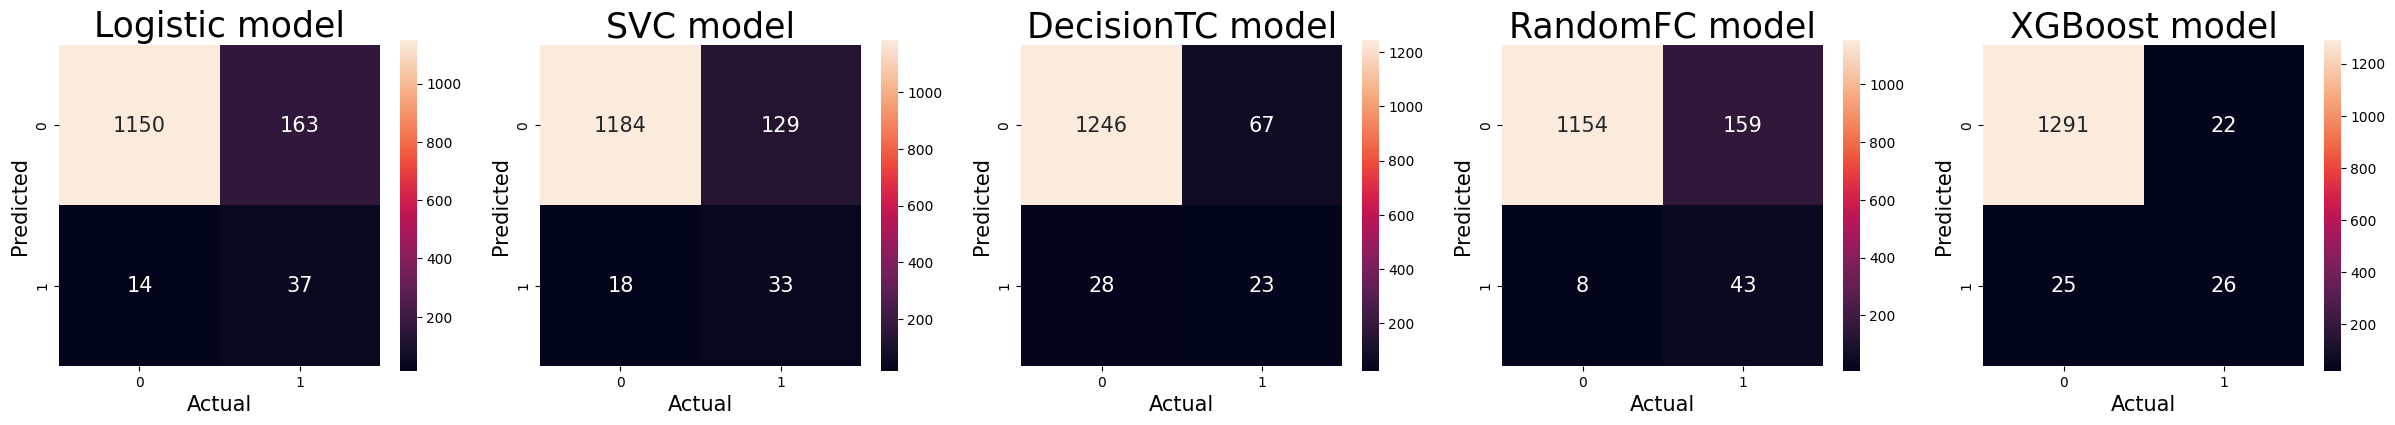

In [ ]:
#plotting confusion matrix
fig, axes = plt.subplots(ncols=5,figsize=(30,10))
models_test = []
for pos, (model_name, model) in enumerate(models_d.items()):
    pred = model.predict(X_test)
    temp_df = pd.DataFrame(confusion_matrix(y_test,pred),range(2),range(2))
    sns.heatmap(temp_df,ax=axes[pos],annot=True,square=True,fmt='g',annot_kws={"size": 15},cbar_kws={"shrink": .43})
    axes[pos].set_title(f'{model_name} model',fontsize=25)
    axes[pos].set_xlabel('Actual',fontsize=15)
    axes[pos].set_ylabel('Predicted',fontsize=15)

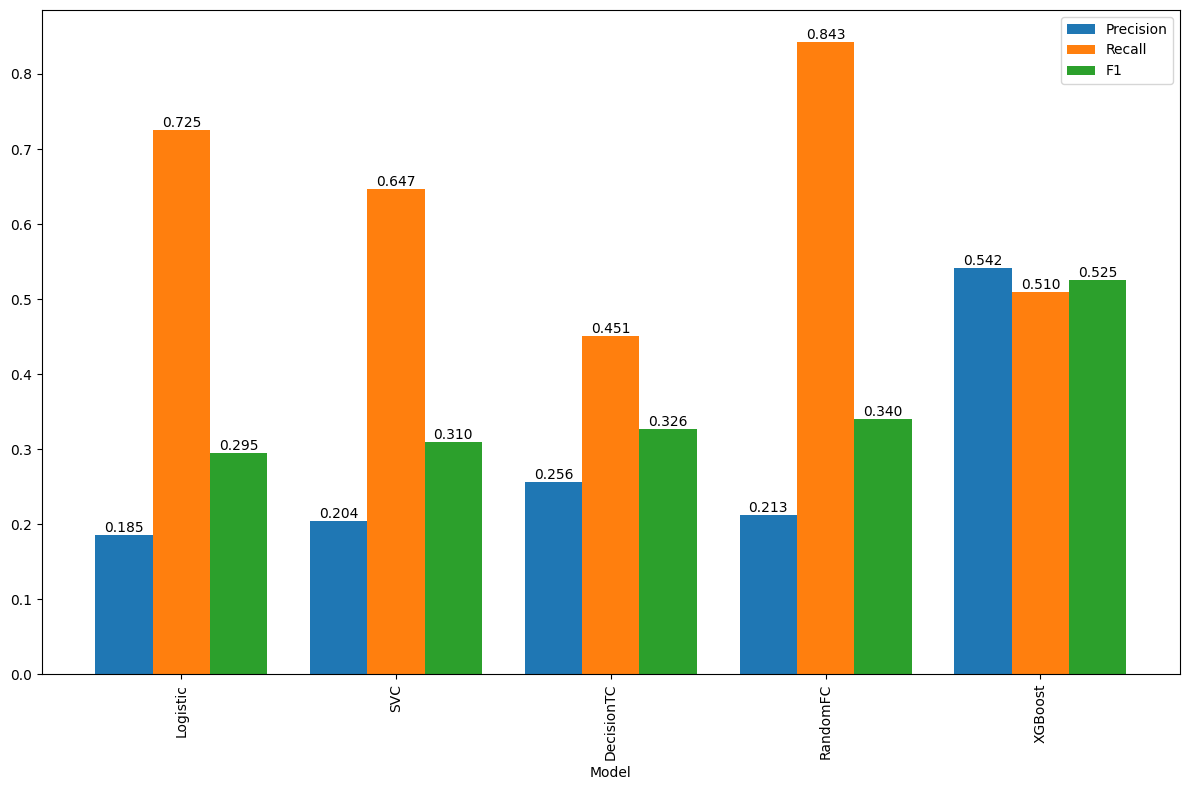

In [ ]:
#plotting precision, recall and f1score graph
pod = pd.DataFrame(columns=['Model','Precision','Recall','F1'])
for model_name, model in models_d.items():
    pred = model.predict(X_test)
    f1 = f1_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    pod.loc[len(pod.index)] = [model_name,precision,recall,f1]

fig, ax = plt.subplots(ncols=1,figsize=(12,8))
ax = pod.set_index('Model').plot(kind='bar', ax=ax, width=0.8)
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fmt='%.3f')
plt.tight_layout()

In [ ]:
#top 10 features by xgBoost
best_model = clf.best_estimator_
feature_importances = best_model.steps[-1][1].feature_importances_
best_model_fi = pd.DataFrame(feature_importances, index=X_train.columns,
                     columns=['Importance']).sort_values(by='Importance', ascending=False).head(10)
best_model_fi

,Importance
NetIncometoTotalAssets,0.138269
Non-industryincomeandexpenditure/revenue,0.126223
Continuousinterestrate(aftertax),0.077098
Borrowingdependency,0.052868
Totaldebt/Totalnetworth,0.051200
CurrentLiabilities/Equity,0.045131
Debtratio%,0.041621
OperatingProfitPerShare(Yuan¥),0.024915
Totalincome/Totalexpense,0.021964
Inventory/CurrentLiability,0.020349


In [ ]:
best_model_fi = best_model_fi.sort_values(by = 'Importance',ascending=True)

<Axes: title={'center': 'Feature Importance'}, xlabel='Features'>

<Figure size 1000x800 with 0 Axes>

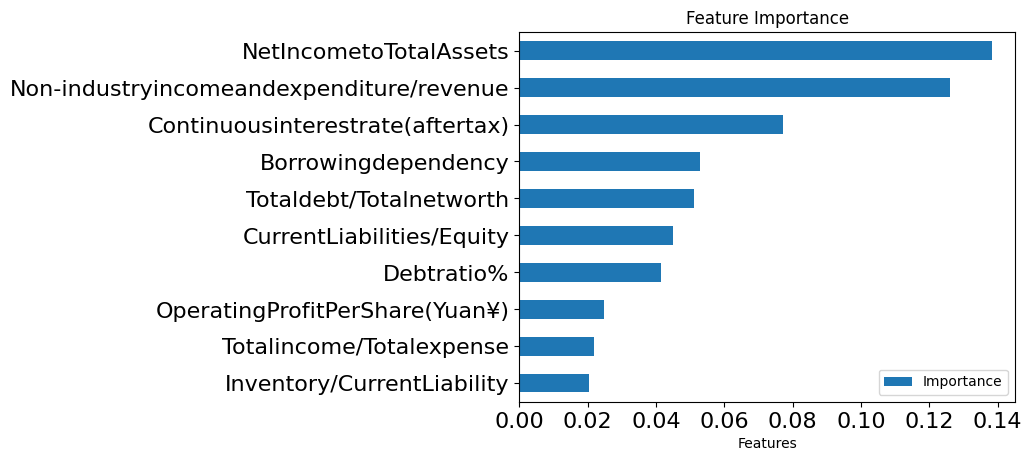

In [ ]:
#plotting bar graph for top 10 features by xgboost
plt.figure(figsize=(10, 8))
best_model_fi.plot(kind='barh', fontsize = 16, xlabel = 'Features', title='Feature Importance')

# PCA

Principal Component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [ ]:
# fitting pca
pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[3.72536624e-01 1.21327531e-01 4.37174740e-02 3.49298190e-02
 3.21371461e-02 2.69846632e-02 2.05453209e-02 1.92899999e-02
 1.74179553e-02 1.64133839e-02 1.61641071e-02 1.54900223e-02
 1.44706340e-02 1.29885767e-02 1.24716075e-02 1.20823872e-02
 1.14971523e-02 1.03100727e-02 9.40628291e-03 8.53799857e-03
 7.99240890e-03 7.19429728e-03 6.50460745e-03 6.28869730e-03
 6.25163902e-03 6.01678026e-03 5.83381825e-03 5.72034436e-03
 5.66115849e-03 5.25249580e-03 5.20893709e-03 4.96890796e-03
 4.91852047e-03 4.71379638e-03 4.62077139e-03 4.56006652e-03
 4.47602677e-03 4.40804972e-03 4.33424236e-03 4.24808916e-03
 4.18554496e-03 4.06099191e-03 3.97507525e-03 3.85049146e-03
 3.46731594e-03 3.25286781e-03 3.12805470e-03 3.03414830e-03
 2.98893810e-03 2.77219930e-03 2.65055044e-03 2.47522704e-03
 2.28510422e-03 2.06336531e-03 1.96207547e-03 1.64328309e-03
 1.51138424e-03 1.46247988e-03 1.31471188e-03 1.23660469e-03
 1.12647045e-03 1.06541438e-03 9.99487316e-04 9.70785294e-04
 8.32415943e-04 7.023227

<BarContainer object of 95 artists>

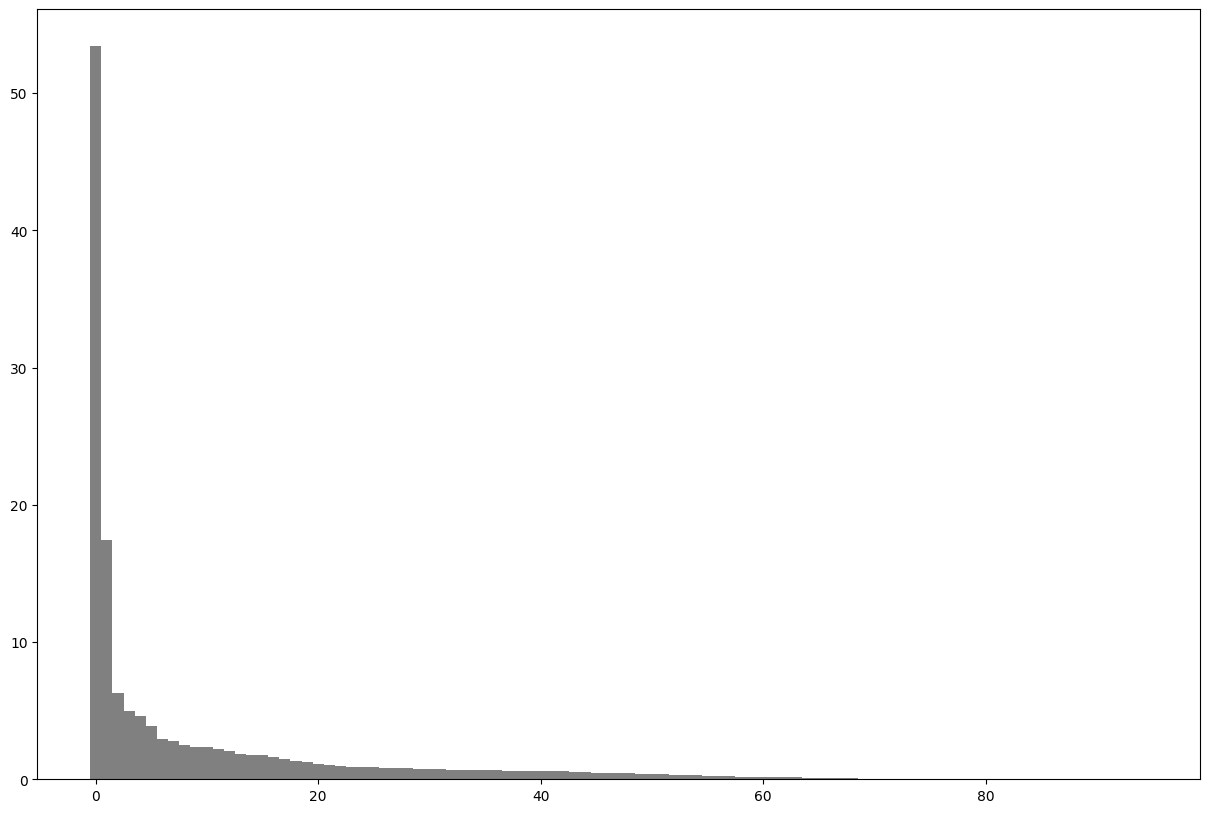

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey", width = 1)

100% of the variance could be explained by almost 60 components.

Text(0.5, 1.0, 'Elbow Plot')

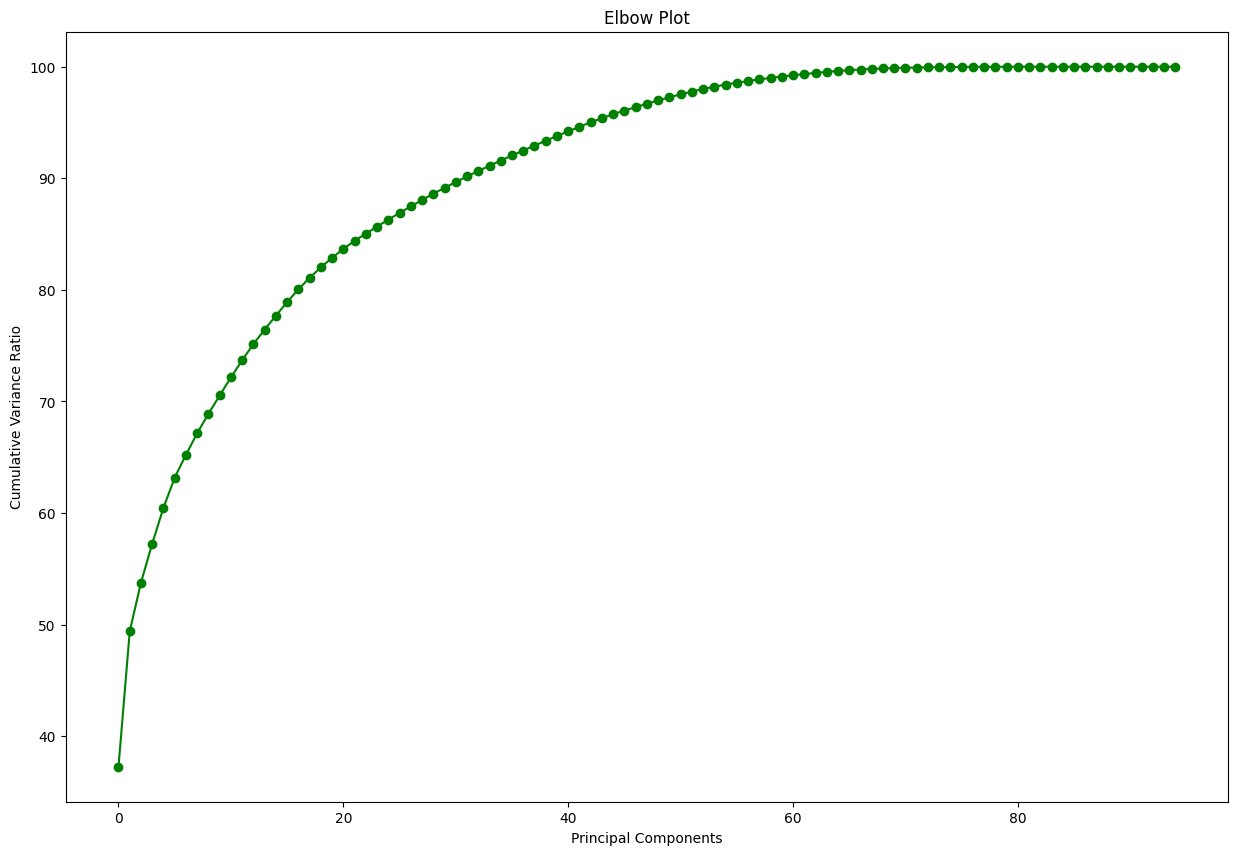

In [ ]:
#plotting elbow plot
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

By looking at the elbow plot, 60 is likely to be the required number of components.

In [ ]:
#fitting pca with 60 components
pca = PCA(60)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train))

X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.214805,1.604300,0.999411,-1.588205,0.119529,0.724589,-0.906333,-0.643352,0.842056,-0.275673,...,0.167221,-1.067323,0.280740,-0.400616,-0.043253,-0.190989,0.158932,-0.219364,0.042606,-0.071618
1,-1.770480,1.404338,-1.676512,1.712933,1.267869,-1.129661,0.054095,0.935044,-0.190109,-0.501011,...,-0.221416,-0.156882,0.116557,-0.171206,0.141761,-0.372583,-0.054095,0.189779,-0.030274,-0.012758
2,-2.218281,2.966415,0.366959,-0.043935,-1.393971,1.128664,0.158676,0.154565,0.040192,0.821552,...,-0.404175,0.356978,-0.169773,0.083783,0.138756,0.172946,-0.050590,-0.072771,-0.018004,0.034694
3,-0.531602,1.371220,-0.931641,0.665623,3.782983,-1.820004,-0.753324,-0.183351,0.909247,-0.381699,...,-0.004892,0.601483,0.376323,0.396110,0.164707,0.352995,-0.418906,0.492342,-0.453400,-0.042586
4,-1.258669,1.080156,-0.122562,-0.063461,1.064492,-0.609129,-0.412543,-0.079610,0.379427,-0.120322,...,-0.362455,0.307722,0.482915,0.099720,0.164484,0.130528,-0.030599,0.162406,0.153798,-0.168728


# Training after PCA

In [ ]:
# training model with gridsearchcv
models_d = {}
score = []
for model_name,mp in model_params.items():
    pipeline = Pipeline([(model_name,mp['model'])])
    clf = GridSearchCV(pipeline,mp['params'],cv=5,n_jobs=14,verbose=2,scoring='recall_weighted')
    clf.fit(X_train_pca,y_train)
    score.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })
    models_d[model_name] = clf
    print(f'{model_name} model done')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Logistic model done
Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVC model done
Fitting 5 folds for each of 2 candidates, totalling 10 fits
DecisionTC model done
Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomFC model done
Fitting 5 folds for each of 2 candidates, totalling 10 fits
XGBoost model done


In [ ]:
#creating df for model results
best_df = pd.DataFrame(score,columns=['model','best_score','best_params'])

In [ ]:
#sort by best_score
best_df.sort_values('best_score',ascending=False)

,model,best_score,best_params
4,XGBoost,0.985623,{'XGBoost__n_estimators': 500}
2,DecisionTC,0.952516,{'DecisionTC__min_samples_split': 4}
1,SVC,0.945800,{'SVC__C': 2}
3,RandomFC,0.906735,"{'RandomFC__max_depth': 4, 'RandomFC__min_samp..."
0,Logistic,0.900681,"{'Logistic__C': 1, 'Logistic__solver': 'newton..."


**PCA slighty increased the score, but doesn't make too much of a difference. One can skip dimension reduction if there is little gain from it.**


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The choice of evaluation metrics depends on the specific goals and requirements of the business problem. However, considering that this is a binary classification problem (bankruptcy prediction), the following metrics are commonly considered for positive business impact:

Precision: This is important when the cost of false positives is high. In the context of bankruptcy prediction, precision measures the accuracy of the model in correctly identifying bankrupt companies among those predicted as bankrupt.

Recall (Sensitivity): If the cost of false negatives is high, recall becomes crucial. It measures the ability of the model to capture all instances of bankrupt companies.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

Area Under the Receiver Operating Characteristic curve (AUC-ROC): AUC-ROC is useful for assessing the overall performance of the model across different classification thresholds. It is particularly relevant when the class distribution is imbalanced.

Choosing the appropriate metrics depends on the business's priorities and the specific consequences of false positives and false negatives in the context of bankruptcy prediction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the provided evaluation results, the XGBoost model achieved the highest best_score of 0.985623. Therefore, I would choose XGBoost as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost provides a built-in feature importance mechanism that can be used to interpret the importance of each feature in making predictions. Feature importance is often expressed as a ranking or score. Higher scores indicate more influential features in the model.

# **Conclusion**

Attribute Importance:

The analysis suggests that various attributes play crucial roles in determining whether a company will go bankrupt or not. These attributes capture different financial aspects and ratios that provide insights into a company's financial health.

Net Income Flag:

The observation that most companies have a Net Income Flag indicating losses over the past two years is a concerning trend. This highlights a potential financial instability among a significant portion of the companies in the dataset.

High Bankruptcy Chances:

Attributes such as "Debt Ratio %," "Current Liability To Assets," and "Current Liability To Current Assets" are identified as significant indicators. When these attributes have high values, there are higher chances that a company might go bankrupt. This insight aligns with financial intuition, as a high debt ratio and current liabilities relative to assets can signify financial strain.

XGBoost Model Performance:

The evaluation results indicate that the XGBoost model outperforms other models, achieving the highest F1 score. F1 score is a suitable metric for binary classification problems, providing a balance between precision and recall. The choice of XGBoost as the best-performing model suggests its effectiveness in capturing complex relationships within the data.

Dataset Analysis and Model Building Success:

The successful analysis of the dataset and the development of the XGBoost model to predict bankruptcy demonstrate the effectiveness of the chosen approach. The insights gained from feature importance and attribute analysis contribute to a better understanding of the financial factors influencing bankruptcy predictions.